In [10]:
### CANNABIS CLASSIFIER ###

# Importing libraries: 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# setting style:
plt.style.use("ggplot")

# importing data:
url = "https://raw.githubusercontent.com/canacosmic/Cannabis-Classifier/master/cannabis_data.csv"

strains = pd.read_csv(url)

strains

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...


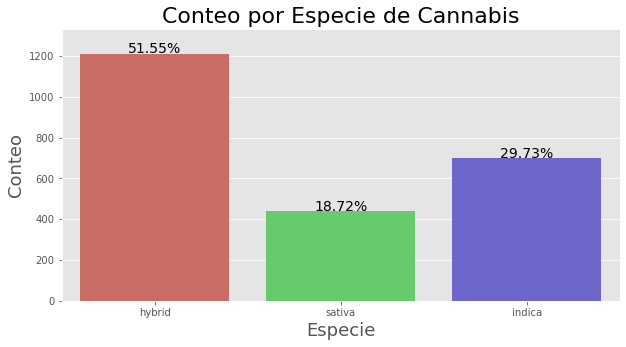

In [11]:
# Checking starin type distribution:

total = len(strains)
plt.figure(figsize = (10,5))

g = sns.countplot(x="Type", data=strains, 
                  palette='hls', color='blue')
g.set_title("Conteo por Especie de Cannabis", fontsize=22)
g.set_xlabel('Especie', fontsize=18)
g.set_ylabel('Conteo', fontsize=18)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

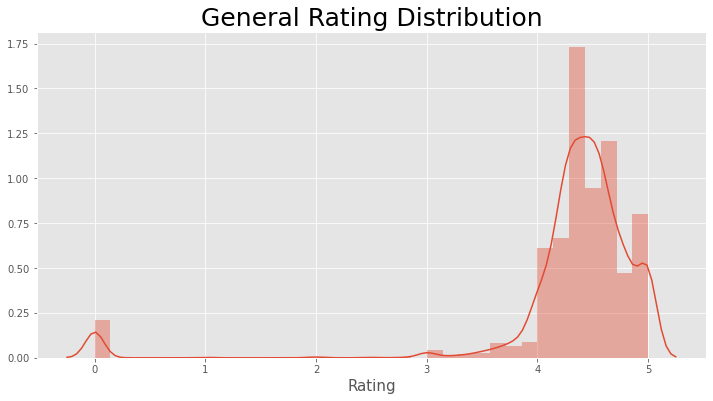

In [12]:
## general rating for all strains 
plt.figure(figsize=(12,6))

g = sns.distplot(strains["Rating"],
                 bins=35)
g.set_title("General Rating Distribution", 
            size = 25)
g.set_xlabel('Rating',
             fontsize=15)

plt.show()

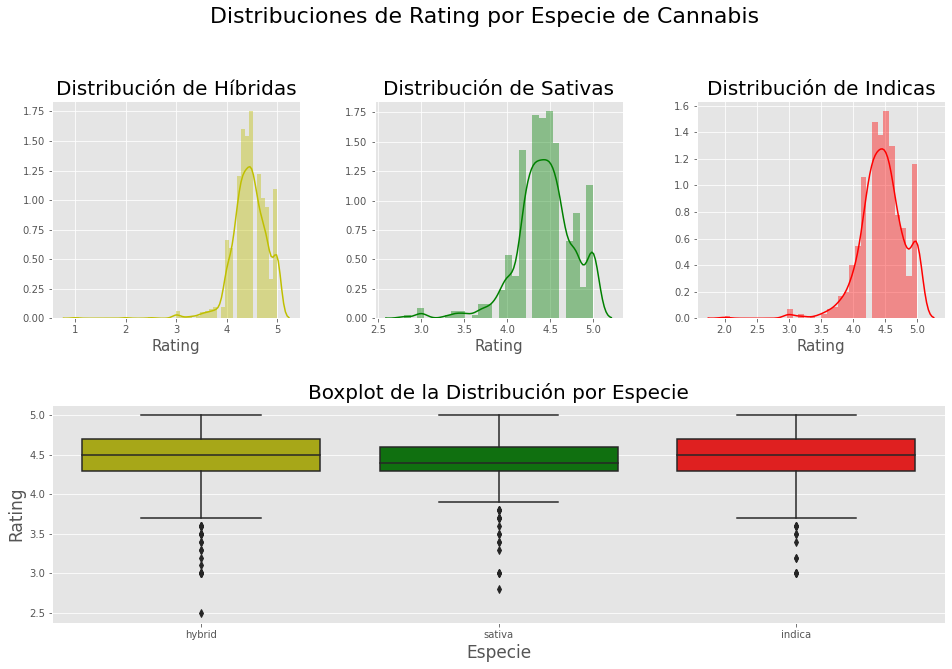

In [13]:
## Rating by phenotype (sativa vs hybird vs indica)

plt.figure(figsize=(16,10))

plt.suptitle('Distribuciones de Rating por Especie de Cannabis', fontsize=22)

g = plt.subplot(231)
g = sns.distplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"],
                 color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_title("Distribución de Híbridas", fontsize=20)

g1 = plt.subplot(232)
g1 = sns.distplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"],
                  color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_title("Distribución de Sativas",
             fontsize=20)

g2 = plt.subplot(233)
g2 = sns.distplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_title("Distribución de Indicas", 
             fontsize=20)

g3 = plt.subplot(212)

my_pal = {"hybrid": "y", "sativa": "g", "indica":"r"}

# Distribucion de ratin por Type:
g3 = sns.boxplot(x="Type",y="Rating",  palette=my_pal,
                data=strains[strains["Rating"] > 2])
g3.set_title("Boxplot de la Distribución por Especie", 
            fontsize=20)
g3.set_xlabel("Especie", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show()

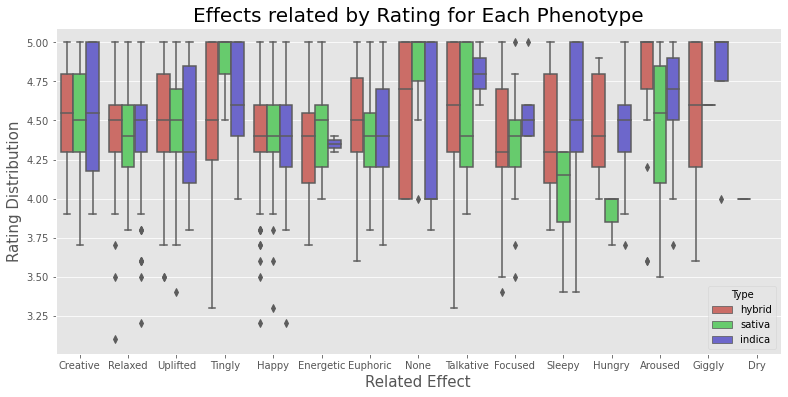

In [14]:
df_effect = pd.DataFrame(strains.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(strains.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])
strains = pd.concat([strains, df_effect], axis=1)
strains = pd.concat([strains, df_flavors], axis=1)

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribution", fontsize=15)
g.set_title("Effects related by Rating for Each Phenotype",
            fontsize=20)

plt.show()

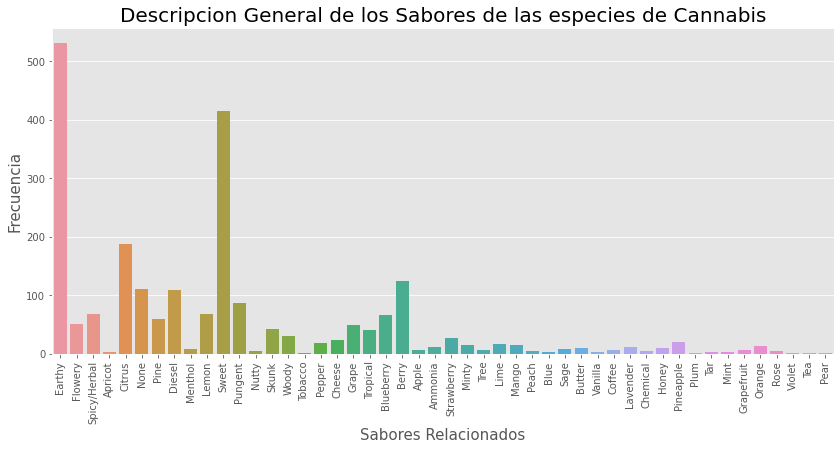

In [15]:
## now we are going to see what are the most common flavours
plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=strains)
plt.xticks(rotation=90)
plt.xlabel('Flavours', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("Flavour Distribution",
          fontsize=20)
plt.show()

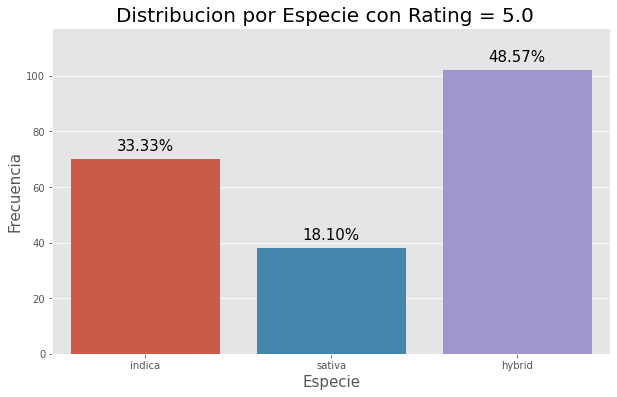

In [16]:
# now we will look on the average rating based on phenotype

total_rat5 = len(strains[strains["Rating"] == 5])

plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=strains[strains["Rating"] == 5])
g.set_xlabel('Phenotype', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribution bye phenotype  ", 
            fontsize=20)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_rat5 * 100),
            ha="center", fontsize=15) 
g.set_ylim(0,max(sizes)*1.15)

plt.show()